In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\packaging\requirements.py", line 36, in __init__
      parsed = _parse_requirement(requirement_string)
    File "C:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\packaging\_parser.py", line 124, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "C:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\packaging\_parser.py", line 145, in _

In [2]:
pip install tensorflow-gpu==2.10

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Welcome\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [4]:
!pip install tensorflow opencv-python matplotlib

In [5]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
astunparse                   1.6.3
certifi                      2025.1.31
charset-normalizer           3.4.1
contourpy                    1.3.1
cycler                       0.12.1
flatbuffers                  25.2.10
fonttools                    4.56.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.70.0
h5py                         3.13.0
idna                         3.10
keras                        3.8.0
kiwisolver                   1.4.8
libclang                     18.1.1
Markdown                     3.7
markdown-it-py               3.0.0
MarkupSafe                   3.0.2
matplotlib                   3.10.0
mdurl                        0.1.2
ml-dtypes                    0.4.1
namex                        0.0.8
numpy                        2.0.2
opencv-python                4.11.0.86
opt_einsum                   3.4.0

In [19]:
import cv2
import imghdr
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [20]:
data_dir = 'data' 

In [21]:
os.listdir(data_dir)

['happy', 'sad']

In [22]:
img=cv2.imread(os.path.join('data', 'happy', 'image22.jpeg'))
img

array([[[ 51,  51,  51],
        [ 54,  56,  56],
        [ 51,  53,  53],
        ...,
        [ 99, 131, 126],
        [ 87, 114, 110],
        [ 70,  97,  93]],

       [[ 52,  52,  52],
        [ 54,  56,  56],
        [ 53,  55,  55],
        ...,
        [107, 141, 135],
        [ 95, 125, 120],
        [ 82, 109, 105]],

       [[ 53,  53,  53],
        [ 55,  57,  57],
        [ 58,  60,  60],
        ...,
        [118, 154, 148],
        [109, 141, 136],
        [ 99, 129, 124]],

       ...,

       [[ 95, 163, 138],
        [ 95, 163, 138],
        [ 96, 161, 140],
        ...,
        [ 27,  38,  66],
        [ 27,  38,  66],
        [ 27,  38,  66]],

       [[ 93, 161, 136],
        [ 93, 161, 136],
        [ 94, 159, 138],
        ...,
        [ 26,  37,  65],
        [ 26,  37,  65],
        [ 26,  37,  65]],

       [[ 92, 160, 135],
        [ 92, 160, 135],
        [ 93, 158, 137],
        ...,
        [ 28,  36,  65],
        [ 26,  37,  65],
        [ 26,  37,  65]]

In [23]:
img.shape

(183, 275, 3)

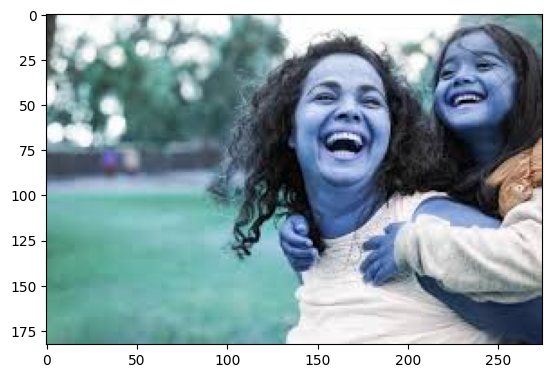

In [25]:
plt.imshow(img)

In [26]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [27]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\10563227-happy-person.jpg
Image not in ext list data\happy\29917610-beautiful-and-happy-man-smiling-with-thumbs-up.jpg
Image not in ext list data\happy\aa69vho0n.webp
Image not in ext list data\happy\businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in ext list data\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data\happy\depositphotos_8807359-stock-photo-mixed-race-man-smiling.jpg
Image not in ext list data\happy\freestock_24044983.jpg
Image not in ext list data\happy\getty_152414899_97046097045006_68075.jpg
Image not in ext list data\happy\getty_478389113_970647970450091_99776.jpg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\Happy20People.jpg
Image not in ext list data\happy\lasses-over-isolated-blue-background-very-happy-and-excited-doing-2467692899.jpg
Image not in ext list data\happy\m-black-man-you-excited-

3.Load Data

In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [95]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 119 files belonging to 2 classes.


In [32]:
#Set 0->HAPPY && 1->SAD
data_iterator = data.as_numpy_iterator()

In [44]:
#Get another batch from data_iterator
batch = data_iterator.next()

In [45]:
batch[0].shape

(32, 256, 256, 3)

In [46]:
batch[1]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

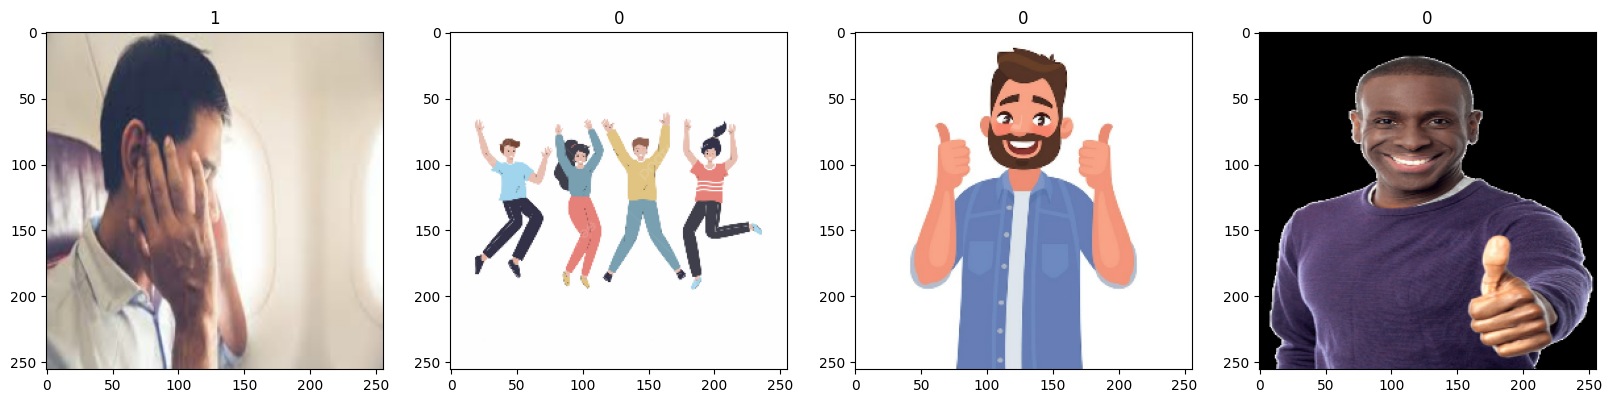

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [96]:
#We want the values to be as low as possible so me find the max val=255 so to bring it b/w 0-1 we do this step
data = data.map(lambda x,y: (x/255, y))

In [97]:
scaled_iterator=data.as_numpy_iterator()

In [98]:
batch=scaled_iterator.next()

In [99]:
batch[0].max()

1.0

5. Split Data

In [100]:
len(data)

4

In [101]:
train_size = int(len(data)*.4)+1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [102]:
train_size

2

In [103]:
val_size

1

In [104]:
test_size

1

In [105]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [106]:
#Check if all space is used
len(train)+len(val)+len(test)==len(data)

True

6. Build Deep Learning Model

In [86]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [112]:
model = Sequential()

In [113]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [114]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

7. Train

In [93]:
#Callback is to save our model in checkpoints or logs...
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [94]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 10s 3s/step - loss: 0.7993 - accuracy: 0.5938 - val_loss: 0.7466 - val_accuracy: 0.4688
Epoch 2/20
2/2 [==============================] - 5s 2s/step - loss: 0.7121 - accuracy: 0.5156 - val_loss: 0.5631 - val_accuracy: 0.5625
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 0.6029 - accuracy: 0.5938 - val_loss: 0.5303 - val_accuracy: 0.6250
Epoch 4/20
2/2 [==============================] - 6s 5s/step - loss: 0.5677 - accuracy: 0.6562 - val_loss: 0.5102 - val_accuracy: 0.9062
Epoch 5/20
2/2 [==============================] - 6s 3s/step - loss: 0.5471 - accuracy: 0.7812 - val_loss: 0.6131 - val_accuracy: 0.6250
Epoch 6/20
2/2 [==============================] - 6s 3s/step - loss: 0.5227 - accuracy: 0.6719 - val_loss: 0.4774 - val_accuracy: 0.6562
Epoch 7/20
2/2 [==============================] - 5s 3s/step - loss: 0.4733 - accuracy: 0.7344 - val_loss: 0.4144 - val_accuracy: 0.8750
Epoch 8/20
2/2 [========================

8. Plot Performance

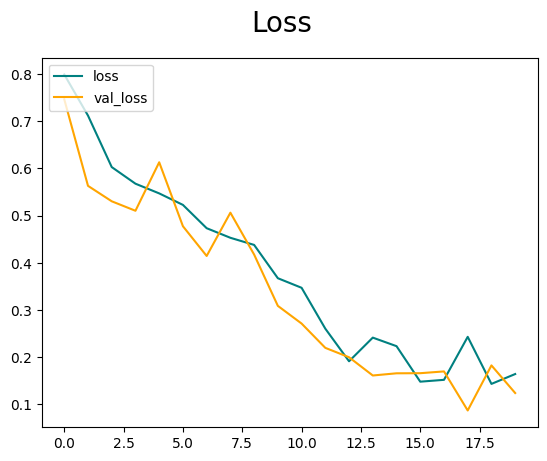

In [115]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

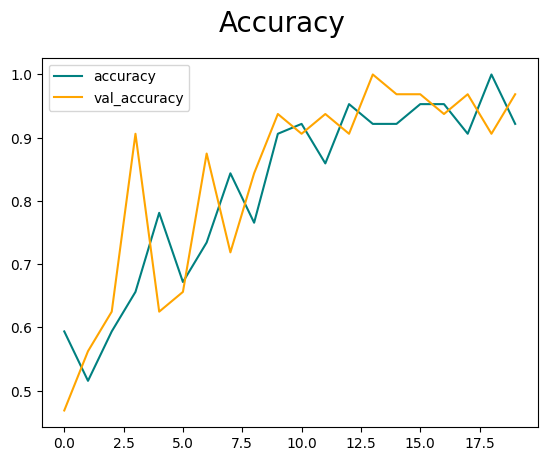

In [118]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [145]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [146]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [147]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 254ms/step


In [168]:
print(f'Precision:{pre.result().numpy()},\nResult:{re.result().numpy()},\nAccuracy:{acc.result().numpy}')

Precision:0.30000001192092896,
Result:0.6666666865348816,
Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.26086956>>


10. Test

In [149]:
import cv2
from matplotlib import pyplot as plt

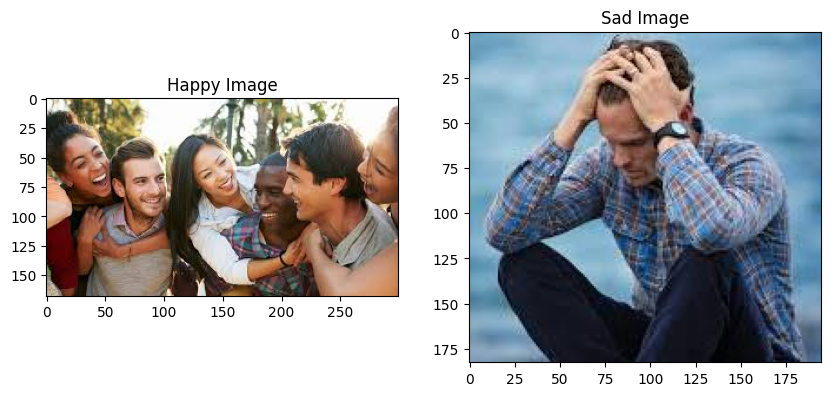

In [180]:
import cv2
import matplotlib.pyplot as plt

# Full path to the image
image_path_happy ='happytest.jpg'
image_path_sad ='sadtest.jpg'

# Read the image
img_happy = cv2.imread(image_path_happy)
img_sad = cv2.imread(image_path_sad)

# Check if the image is loaded properly
if img_happy is None or img_sad is None:
    print("Error: Could not load image. Check the file path!")
else:
    # Convert BGR to RGB
    img_rgb_happy = cv2.cvtColor(img_happy, cv2.COLOR_BGR2RGB)
    img_rgb_sad = cv2.cvtColor(img_sad, cv2.COLOR_BGR2RGB)

    # Display both images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)  
    plt.imshow(img_rgb_happy)
    plt.title("Happy Image")

    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb_sad)
    plt.title("Sad Image")

    plt.show()


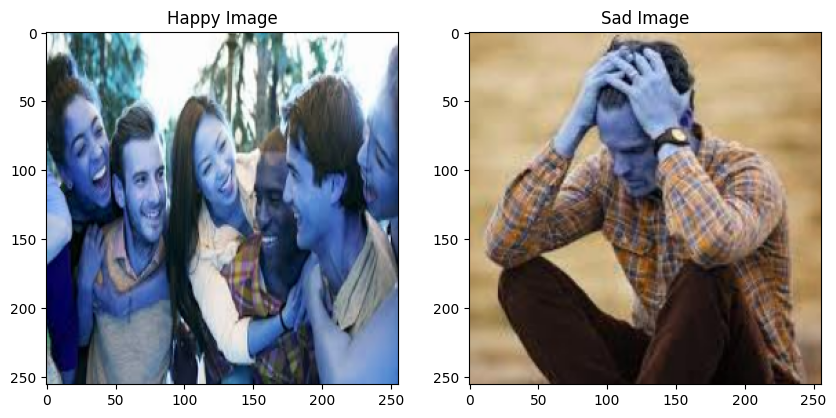

In [183]:
resize_happy = tf.image.resize(img_happy, (256,256))
resize_sad = tf.image.resize(img_sad, (256,256))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.imshow(resize_happy.numpy().astype(int))
plt.title("Happy Image")
plt.subplot(1, 2, 2)
plt.imshow(resize_sad.numpy().astype(int))
plt.title("Sad Image")
plt.show()

In [185]:
yhat_happy = model.predict(np.expand_dims(resize_happy/255, 0))
yhat_sad = model.predict(np.expand_dims(resize_sad/255, 0))

1/1 [==============================] - 0s 65ms/step


In [186]:
yhat_happy

array([[0.49783447]], dtype=float32)

In [187]:
yhat_sad

array([[0.5028112]], dtype=float32)

In [ ]:
check=[yhat_happy,yhat_sad]

In [188]:
for check in range(2):
    if check>0.5: 
        print(f'Predicted class is Sad')
    else:
        print(f'Predicted class is Happy')

Predicted class is Happy
Predicted class is Sad
